For reference, these are the commands I used to generate the output files

    bedtools intersect -a fto_rep1_sig_peaks.bed -b hg19_genes.bed -s -wo > rep1_peaks_in_genes.txt
    
    bedtools intersect -a fto_rep1_sig_peaks.bed -b upreg_genes.bed -s -wo > rep1_peaks_in_up_genes.txt
    
    bedtools intersect -a fto_rep1_sig_peaks.bed -b downreg_genes.bed -s -wo > rep1_peaks_in_down_genes.txt

In [1]:
import pandas as pd
from matplotlib_venn import venn3
%matplotlib inline

In [3]:
col_names = ['peak_chr','peak_start','peak_stop','pval','fc','peak_strand',
            'gene_chr','gene_start','gene_stop','geneid','gene_name',
             'gene_strand','overlap']

In [7]:
clip_dir = "/home/ucsd-train01/projects/fto_shrna/fto_clip/"

peaks_all_genes = pd.read_table(clip_dir+"rep1_peaks_in_genes.txt",
                               names = col_names, index_col=0)
print peaks_all_genes.shape
peaks_all_genes.head()

(4040, 12)


,peak_start,peak_stop,pval,fc,peak_strand,gene_chr,gene_start,gene_stop,geneid,gene_name,gene_strand,overlap
peak_chr,,,,,,,,,,,,
chr7,128502977,128503105,27.176232,2.874631,+,chr7,128502880,128505898,ENSG00000128524.4,ATP6V1F,+,128
chr7,140396555,140396643,24.549890,3.739772,+,chr7,140390577,140422590,ENSG00000090266.8,NDUFB2,+,88
chr7,150066826,150066915,17.262688,3.449854,+,chr7,150065278,150071133,ENSG00000214022.7,REPIN1,+,89
chr7,150066826,150066915,17.262688,3.449854,+,chr7,150065879,150109558,ENSG00000196456.4,ZNF775,+,89
chr7,140402683,140402751,16.942373,4.468390,+,chr7,140390577,140422590,ENSG00000090266.8,NDUFB2,+,68


In [8]:
peaks_up_genes = pd.read_table(clip_dir+"rep1_peaks_in_up_genes.txt",
                               names = col_names, index_col=0)
print peaks_up_genes.shape
peaks_up_genes.head()

(31, 12)


,peak_start,peak_stop,pval,fc,peak_strand,gene_chr,gene_start,gene_stop,geneid,gene_name,gene_strand,overlap
peak_chr,,,,,,,,,,,,
chr19,16187311,16187465,7.117180,2.650767,+,chr19,16177831,16213813,ENSG00000167460.10,TPM4,+,154
chr19,45419479,45419566,5.459783,2.630009,+,chr19,45417504,45422606,ENSG00000130208.5,APOC1,+,87
chr19,16198839,16198911,3.344689,2.193909,+,chr19,16177831,16213813,ENSG00000167460.10,TPM4,+,72
chr19,45418180,45418207,3.275269,2.614241,+,chr19,45417504,45422606,ENSG00000130208.5,APOC1,+,27
chr8,11710903,11710989,20.616005,3.363109,-,chr8,11700033,11726957,ENSG00000164733.16,CTSB,-,86


In [9]:
peaks_down_genes = pd.read_table(clip_dir+"rep1_peaks_in_down_genes.txt",
                               names = col_names, index_col=0)
print peaks_down_genes.shape
peaks_down_genes.head()

(59, 12)


,peak_start,peak_stop,pval,fc,peak_strand,gene_chr,gene_start,gene_stop,geneid,gene_name,gene_strand,overlap
peak_chr,,,,,,,,,,,,
chr7,107531654,107531741,12.132662,2.750303,+,chr7,107531415,107572175,ENSG00000091140.8,DLD,+,87
chr7,107533642,107533671,7.056318,3.029279,+,chr7,107531415,107572175,ENSG00000091140.8,DLD,+,29
chr7,107533671,107533720,3.375223,2.328839,+,chr7,107531415,107572175,ENSG00000091140.8,DLD,+,49
chr20,32031410,32031493,3.992077,2.820692,-,chr20,31995761,32031698,ENSG00000101400.5,SNTA1,-,83
chr22,21996636,21996775,80.235547,3.693780,+,chr22,21996550,21998587,ENSG00000128228.4,SDF2L1,+,139


In [10]:
peaks_all_genes.head()

,peak_start,peak_stop,pval,fc,peak_strand,gene_chr,gene_start,gene_stop,geneid,gene_name,gene_strand,overlap
peak_chr,,,,,,,,,,,,
chr7,128502977,128503105,27.176232,2.874631,+,chr7,128502880,128505898,ENSG00000128524.4,ATP6V1F,+,128
chr7,140396555,140396643,24.549890,3.739772,+,chr7,140390577,140422590,ENSG00000090266.8,NDUFB2,+,88
chr7,150066826,150066915,17.262688,3.449854,+,chr7,150065278,150071133,ENSG00000214022.7,REPIN1,+,89
chr7,150066826,150066915,17.262688,3.449854,+,chr7,150065879,150109558,ENSG00000196456.4,ZNF775,+,89
chr7,140402683,140402751,16.942373,4.468390,+,chr7,140390577,140422590,ENSG00000090266.8,NDUFB2,+,68


In [16]:
bound_genes = set(peaks_all_genes['geneid'])
print len(bound_genes)


2088


In [17]:
bound_up_genes = set(peaks_up_genes['geneid'])
print len(bound_up_genes)

17


In [18]:
bound_down_genes = set(peaks_down_genes['geneid'])
print len(bound_down_genes)

22


<matplotlib_venn._common.VennDiagram instance at 0x2ae5e3e79518>

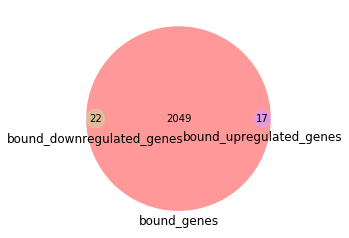

In [21]:
venn3([bound_genes, bound_down_genes, bound_up_genes], 
     set_labels = ("bound_genes","bound_downregulated_genes",
                   "bound_upregulated_genes"))

In [22]:
deseq_dir = "/home/ucsd-train01/projects/fto_shrna/deseq2/"
diff_expr = pd.read_csv(deseq_dir+"fto_differential_expression.csv", 
                        index_col=0)
diff_expr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000227232.4,188.164739,0.103508,0.204214,0.506859,0.612253,0.767655
ENSG00000238009.2,155.740856,-0.261361,0.205231,-1.273497,0.202842,0.379350
ENSG00000237683.5,910.246750,-0.067970,0.126744,-0.536274,0.591769,0.752541
ENSG00000239906.1,38.325765,-0.495521,0.301454,-1.643771,0.100224,0.229453
ENSG00000241860.2,93.751029,-0.186635,0.239773,-0.778381,0.436344,0.626372


In [23]:
diff_expr_sig = diff_expr.loc[diff_expr['padj'] < 0.05]
print diff_expr_sig.shape
diff_expr_sig.head()

(4640, 6)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000229344.1,5630.346350,-0.597121,0.243273,-2.454533,1.410678e-02,4.972991e-02
ENSG00000198744.5,6481.490642,-0.804575,0.246964,-3.257861,1.122552e-03,6.218383e-03
ENSG00000230699.2,42.990196,1.238847,0.306472,4.042280,5.293406e-05,4.522651e-04
ENSG00000223764.2,8.992571,0.930648,0.307830,3.023259,2.500684e-03,1.211482e-02
ENSG00000187634.6,21.021211,1.845161,0.326564,5.650231,1.602326e-08,3.534224e-07


In [26]:
diff_expr_genes = set(diff_expr_sig.index)
len(diff_expr_genes)

4640

<matplotlib_venn._common.VennDiagram instance at 0x2ae5e41b8a28>

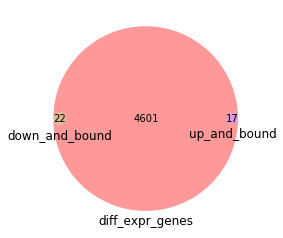

In [28]:
venn3([diff_expr_genes, bound_down_genes, bound_up_genes],
     set_labels = ("diff_expr_genes","down_and_bound","up_and_bound"))